In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.genmod.families.family import Binomial
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrix
from rpy2 import robjects
from statsmodels.nonparametric.smoothers_lowess import lowess

%matplotlib inline
plt.style.use('ggplot')

# Polynomial Regression and Step Functions

In [2]:
wage = pd.read_csv('./Downloads/Wage.csv', index_col=0)
wage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 231655 to 453557
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        3000 non-null   int64  
 1   age         3000 non-null   int64  
 2   maritl      3000 non-null   object 
 3   race        3000 non-null   object 
 4   education   3000 non-null   object 
 5   region      3000 non-null   object 
 6   jobclass    3000 non-null   object 
 7   health      3000 non-null   object 
 8   health_ins  3000 non-null   object 
 9   logwage     3000 non-null   float64
 10  wage        3000 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 281.2+ KB


In [3]:
wage.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
231655,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
86582,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
161300,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
155159,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
11443,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [4]:
poly4 = PolynomialFeatures(4)
age4 = poly4.fit_transform(wage['age'].values.reshape(-1, 1))

est4 = sm.OLS(wage['wage'], age4).fit()
est4.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-184.1542,60.040,-3.067,0.002,-301.879,-66.430
x1,21.2455,5.887,3.609,0.000,9.703,32.788
x2,-0.5639,0.206,-2.736,0.006,-0.968,-0.160
x3,0.0068,0.003,2.221,0.026,0.001,0.013
x4,-3.204e-05,1.64e-05,-1.952,0.051,-6.42e-05,1.45e-07


In [5]:
age_grid = np.arange(wage['age'].min(), wage['age'].max())
age4_test = poly4.fit_transform(age_grid.reshape(-1, 1))

pred4_table = est4.get_prediction(age4_test).summary_frame()
pred4_table

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,51.931450,5.298268,41.542837,62.320064,-27.018198,130.881099
1,58.496742,4.370763,49.926741,67.066743,-20.234247,137.227731
2,64.571879,3.592101,57.528645,71.615113,-14.007576,143.151334
3,70.182732,2.955813,64.387103,75.978361,-8.294736,148.660200
4,75.354403,2.455588,70.539593,80.169212,-3.056732,153.765537
...,...,...,...,...,...,...
57,97.098152,6.752911,83.857339,110.338965,17.722823,176.473481
58,94.514913,7.773327,79.273313,109.756513,14.781419,174.248407
59,91.688926,8.959688,74.121161,109.256692,11.478266,171.899587
60,88.602233,10.323512,68.360341,108.844125,7.763765,169.440701


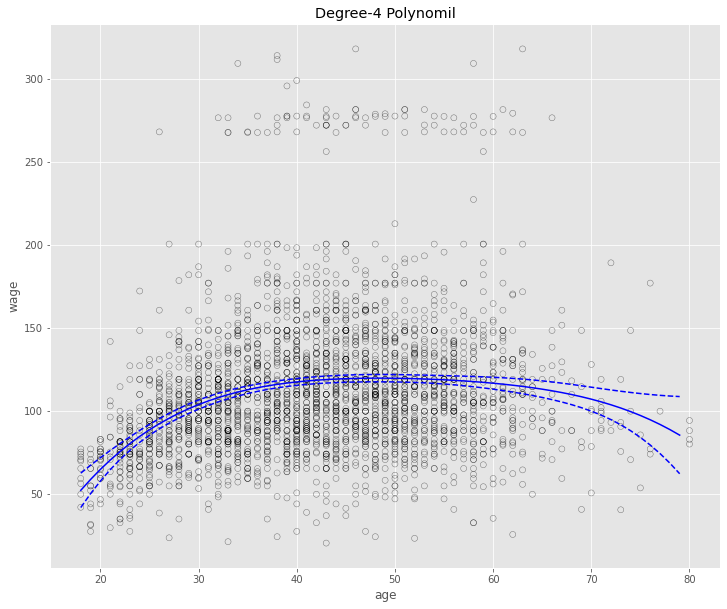

In [6]:
plt.figure(figsize=(12, 10))

sns.scatterplot(x=wage['age'], y=wage['wage'], facecolor='none', edgecolor='k', alpha=.5)
sns.lineplot(x=age_grid, y=pred4_table.loc[:, 'mean'], color='blue')
sns.lineplot(x=age_grid, y=pred4_table.loc[:, 'mean_ci_upper'], color='blue', ls='--')
sns.lineplot(x=age_grid, y=pred4_table.loc[:, 'mean_ci_lower'], color='blue', ls='--')

plt.title('Degree-4 Polynomil')

plt.show()

In [7]:
poly2 = PolynomialFeatures(2)
poly3 = PolynomialFeatures(3)
poly5 = PolynomialFeatures(5)

age2 = poly2.fit_transform(wage['age'].values.reshape(-1, 1))
age3 = poly3.fit_transform(wage['age'].values.reshape(-1, 1))
age5 = poly5.fit_transform(wage['age'].values.reshape(-1, 1))

est = sm.OLS(wage['wage'], wage['age']).fit()
est2 = sm.OLS(wage['wage'], age2).fit()
est3 = sm.OLS(wage['wage'], age3).fit()
est5 = sm.OLS(wage['wage'], age5).fit()

In [8]:
sm.stats.anova_lm(est, est2, est3, est4, est5)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2999.0,6.402646e+06,0.0,NaN,NaN,NaN
1,2997.0,4.793430e+06,2.0,1.609216e+06,504.996744,9.802965e-190
2,2996.0,4.777674e+06,1.0,1.575569e+04,9.888756,1.679202e-03
3,2995.0,4.771604e+06,1.0,6.070152e+03,3.809813,5.104620e-02
4,2994.0,4.770322e+06,1.0,1.282563e+03,0.804976,3.696820e-01


In [9]:
est5.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-49.7046,161.435,-0.308,0.758,-366.239,266.830
x1,3.9930,20.110,0.199,0.843,-35.438,43.424
x2,0.2760,0.958,0.288,0.773,-1.603,2.155
x3,-0.0126,0.022,-0.577,0.564,-0.056,0.030
x4,0.0002,0.000,0.762,0.446,-0.000,0.001
x5,-9.157e-07,1.02e-06,-0.897,0.370,-2.92e-06,1.09e-06


In [10]:
est5.summary2().tables[1].loc['x5', 't']**2

0.8049758285521795

In [11]:
est_ed = smf.ols('wage ~ education + age', wage).fit()
est2_ed = smf.ols('wage ~ education + age + np.power(age, 2)', wage).fit()
est3_ed = smf.ols('wage ~ education + age + np.power(age, 2) + np.power(age, 3)', wage).fit()

In [12]:
sm.stats.anova_lm(est_ed, est2_ed, est3_ed)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2994.0,3.867992e+06,0.0,NaN,NaN,NaN
1,2993.0,3.725395e+06,1.0,142597.097010,114.696898,2.728001e-26
2,2992.0,3.719809e+06,1.0,5586.660322,4.493588,3.410431e-02


In [13]:
y = pd.factorize(wage['wage'] > 250)[0]

In [14]:
df = pd.DataFrame(age4[:, 1:], columns=['age', 'age2', 'age3', 'age4'])
df['y'] = y
df

,age,age2,age3,age4,y
0,18.0,324.0,5832.0,104976.0,0
1,24.0,576.0,13824.0,331776.0,0
2,45.0,2025.0,91125.0,4100625.0,0
3,43.0,1849.0,79507.0,3418801.0,0
4,50.0,2500.0,125000.0,6250000.0,0
...,...,...,...,...,...
2995,44.0,1936.0,85184.0,3748096.0,0
2996,30.0,900.0,27000.0,810000.0,0
2997,27.0,729.0,19683.0,531441.0,0
2998,27.0,729.0,19683.0,531441.0,0


In [15]:
est_logit = smf.logit('y ~ age + age2 + age3 + age4', df).fit()
est_logit.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.116870
         Iterations 12


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-109.5530,47.655,-2.299,0.022,-202.956,-16.150
age,8.9950,4.187,2.148,0.032,0.789,17.201
age2,-0.2816,0.135,-2.081,0.037,-0.547,-0.016
age3,0.0039,0.002,2.022,0.043,0.000,0.008
age4,-1.949e-05,9.91e-06,-1.966,0.049,-3.89e-05,-6.41e-08


In [16]:
est_logit = sm.GLM(y, age4, family=Binomial()).fit()
est_logit.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
const,-109.5530,47.655,-2.299,0.022,-202.956,-16.150
x1,8.9950,4.187,2.148,0.032,0.789,17.201
x2,-0.2816,0.135,-2.081,0.037,-0.547,-0.016
x3,0.0039,0.002,2.022,0.043,0.000,0.008
x4,-1.949e-05,9.91e-06,-1.966,0.049,-3.89e-05,-6.41e-08


In [17]:
pred_logit_table = est_logit.get_prediction(age4_test).summary_frame()
pred_logit_table

,mean,mean_se,mean_ci_lower,mean_ci_upper
0,9.826349e-09,6.037272e-08,5.789509e-14,0.001665
1,7.577793e-08,3.984230e-07,2.535830e-12,0.002259
2,4.746672e-07,2.120648e-06,7.473355e-11,0.003006
3,2.449189e-06,9.225813e-06,1.522781e-09,0.003924
4,1.055184e-05,3.322776e-05,2.202266e-08,0.005030
...,...,...,...,...
57,2.584796e-04,9.849200e-04,1.473162e-07,0.312129
58,8.498454e-05,3.831079e-04,1.235544e-08,0.368945
59,2.392487e-05,1.266642e-04,7.452129e-10,0.434434
60,5.695035e-06,3.517327e-05,3.150200e-11,0.507287


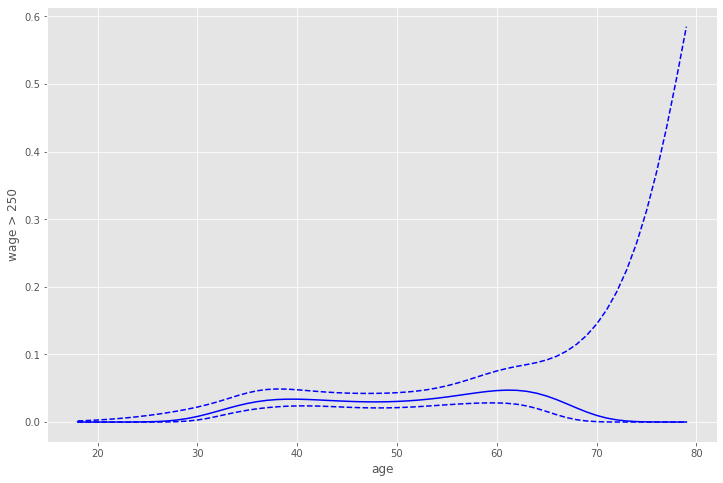

In [18]:
plt.figure(figsize=(12, 8))

sns.lineplot(x=age_grid, y=pred_logit_table.loc[:, 'mean'], color='blue')
sns.lineplot(x=age_grid, y=pred_logit_table.loc[:, 'mean_ci_upper'], color='blue', ls='--')
sns.lineplot(x=age_grid, y=pred_logit_table.loc[:, 'mean_ci_lower'], color='blue', ls='--')

plt.xlabel('age')
plt.ylabel('wage > 250')

plt.show()

In [19]:
age_cut, bins = pd.cut(wage['age'], 4, retbins=True)
age_steps = pd.concat([wage['age'], age_cut, wage['wage']], keys=['age', 'age_cut', 'wage'], axis=1)
age_steps.head()

,age,age_cut,wage
231655,18,"(17.938, 33.5]",75.043154
86582,24,"(17.938, 33.5]",70.476020
161300,45,"(33.5, 49.0]",130.982177
155159,43,"(33.5, 49.0]",154.685293
11443,50,"(49.0, 64.5]",75.043154


In [20]:
df = pd.get_dummies(age_steps, drop_first=True)
df.head()

,age,wage,"age_cut_(33.5, 49.0]","age_cut_(49.0, 64.5]","age_cut_(64.5, 80.0]"
231655,18,75.043154,0,0,0
86582,24,70.476020,0,0,0
161300,45,130.982177,1,0,0
155159,43,154.685293,1,0,0
11443,50,75.043154,0,1,0


In [21]:
est = sm.OLS(df['wage'], sm.add_constant(df.drop(['age', 'wage'], axis=1))).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,94.1584,1.476,63.790,0.000,91.264,97.053
"age_cut_(33.5, 49.0]",24.0535,1.829,13.148,0.000,20.466,27.641
"age_cut_(49.0, 64.5]",23.6646,2.068,11.443,0.000,19.610,27.719
"age_cut_(64.5, 80.0]",7.6406,4.987,1.532,0.126,-2.139,17.420


# Splines

In [24]:
age_grid = np.arange(wage['age'].min(), wage['age'].max())

X_train_cubic = dmatrix('bs(age, knots=(25, 40, 60), include_intercept=True)', {
                        'age': wage['age']}, return_type='dataframe')
X_test_cubic = dmatrix('bs(age_grid, knots=(25, 40, 60), include_intercept=True)', {
                        'age_grid': age_grid}, return_type='dataframe')

In [25]:
est_cubic = sm.OLS(wage['wage'], X_train_cubic).fit()
res_cubic = est_cubic.get_prediction(X_test_cubic).summary_frame()
res_cubic.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,60.493714,9.460394,41.944181,79.043247,-19.956535,140.943964
1,62.712544,5.625190,51.682914,73.742173,-16.343197,141.768284
2,65.816025,3.775855,58.412491,73.219558,-12.815838,144.447887
3,69.592432,3.334695,63.053907,76.130958,-8.962706,148.147570
4,73.830041,3.220376,67.515666,80.144416,-4.706758,152.366840


In [26]:
X_train_natural = dmatrix(
    'cr(age, df=4)', {'age': wage['age']}, return_type='dataframe')
X_test_natural = dmatrix('cr(age_grid, df=4)', {
                       'age_grid': age_grid}, return_type='dataframe')

In [27]:
est_natural = sm.OLS(wage['wage'], X_train_natural).fit()
res_natural = est_natural.get_prediction(X_test_natural).summary_frame()
res_natural.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,64.974311,3.231501,58.638126,71.310496,-13.622776,143.571399
1,68.146888,2.986650,62.290797,74.002980,-10.412953,146.706730
2,71.310143,2.746791,65.924357,76.695930,-7.216041,149.836327
3,74.454753,2.513860,69.525686,79.383820,-4.041429,152.950935
4,77.571396,2.289986,73.081292,82.061501,-0.898445,156.041237


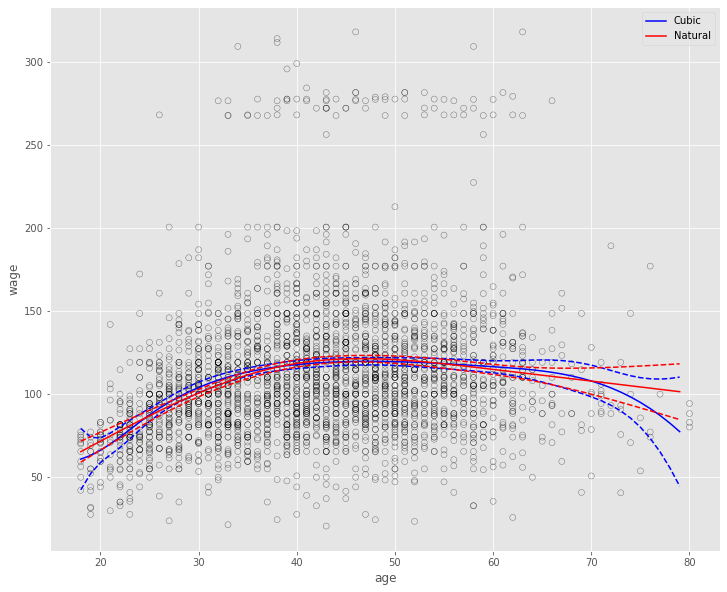

In [28]:
plt.figure(figsize=(12, 10))

sns.scatterplot(x=wage['age'], y=wage['wage'], facecolor='none', edgecolor='k', alpha=.5)

sns.lineplot(x=age_grid, y=res_cubic['mean'], color='blue', label='Cubic')
sns.lineplot(x=age_grid, y=res_cubic['mean_ci_lower'], color='blue', linestyle='--')
sns.lineplot(x=age_grid, y=res_cubic['mean_ci_upper'], color='blue', linestyle='--')

sns.lineplot(x=age_grid, y=res_natural['mean'], color='red', label='Natural')
sns.lineplot(x=age_grid, y=res_natural['mean_ci_lower'], color='red', linestyle='--')
sns.lineplot(x=age_grid, y=res_natural['mean_ci_upper'], color='red', linestyle='--')

plt.show()

In [31]:
x = wage['age']
y = wage['wage']

r_x = robjects.FloatVector(x)
r_y = robjects.FloatVector(y)

r_smooth_spline = robjects.r['smooth.spline']

spline_xy = r_smooth_spline(x=r_x, y=r_y, df=16)
yspline = np.array(robjects.r['predict'](spline_xy,robjects.FloatVector(x)).rx2('y'))

spline_xy_cv = r_smooth_spline(x=r_x, y=r_y, cv=True)
yspline_cv = np.array(robjects.r['predict'](spline_xy_cv,robjects.FloatVector(x)).rx2('y'))

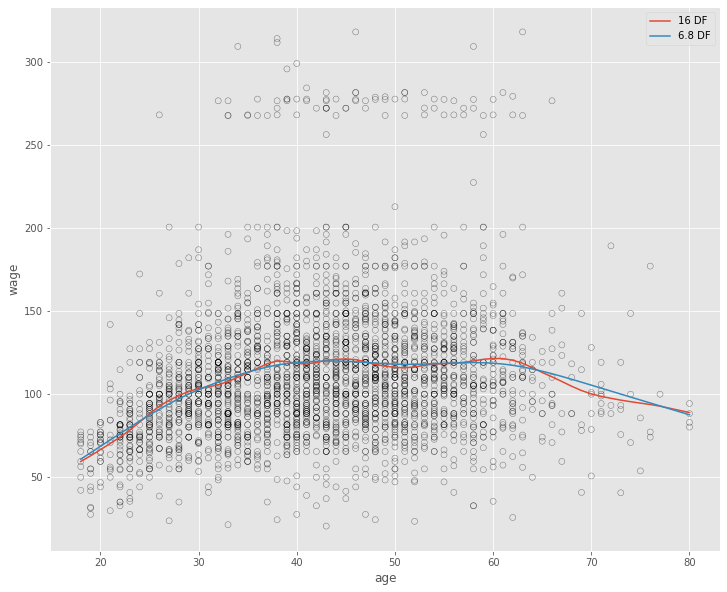

In [32]:
plt.figure(figsize=(12, 10))

sns.scatterplot(x=wage['age'], y=wage['wage'], facecolor='none', edgecolor='k', alpha=.5)

sns.lineplot(x=wage['age'], y=yspline, label='16 DF')
sns.lineplot(x=wage['age'], y=yspline_cv, label='6.8 DF')

plt.show()

In [35]:
lowess02 = lowess(wage['wage'], wage['age'], frac=.2)
lowess05 = lowess(wage['wage'], wage['age'], frac=.5)

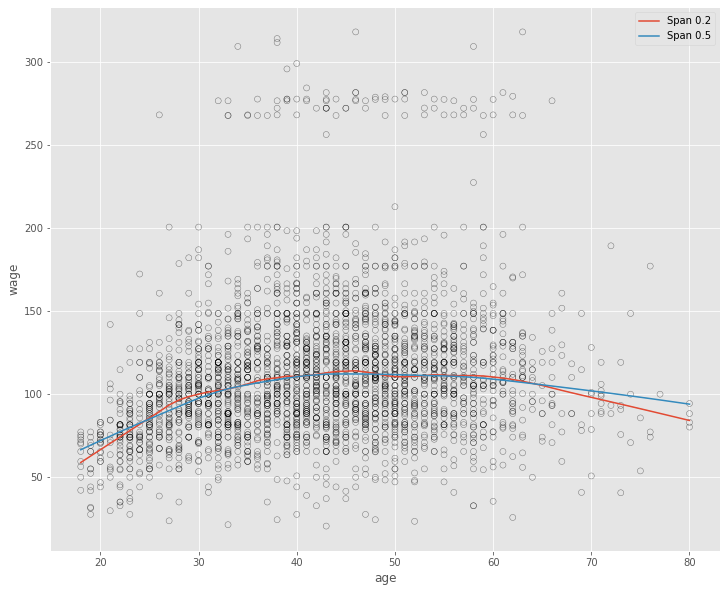

In [36]:
plt.figure(figsize=(12, 10))

sns.scatterplot(x=wage['age'], y=wage['wage'], facecolor='none', edgecolor='k', alpha=.5)

sns.lineplot(x=lowess02[:, 0], y=lowess02[:, 1], label='Span 0.2')
sns.lineplot(x=lowess05[:, 0], y=lowess05[:, 1], label='Span 0.5')

plt.show()

# GAMs

In [37]:
X = dmatrix("cr(year, df=4)+cr(age, df=5)+education",
            {'year': wage['year'], 'age': wage['age'], 'education': wage['education']}, return_type='dataframe')
y = wage['wage']

In [38]:
est = sm.OLS(y, X).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,52.0059,2.009,25.892,0.000,48.068,55.944
education[T.2. HS Grad],10.7858,2.431,4.438,0.000,6.020,15.551
education[T.3. Some College],23.1820,2.560,9.055,0.000,18.162,28.202
education[T.4. College Grad],37.8598,2.543,14.889,0.000,32.874,42.846
education[T.5. Advanced Degree],62.3017,2.762,22.556,0.000,56.886,67.717
"cr(year, df=4)[0]",8.5675,1.375,6.232,0.000,5.872,11.263
"cr(year, df=4)[1]",12.9712,1.269,10.223,0.000,10.483,15.459
"cr(year, df=4)[2]",14.5819,1.309,11.139,0.000,12.015,17.149
"cr(year, df=4)[3]",15.8853,1.528,10.398,0.000,12.890,18.881
"cr(age, df=5)[0]",-19.1099,3.298,-5.795,0.000,-25.576,-12.644
